## Model Training


### 1.1 Import Data and Required packages

Importing pandas, numpy, matplotlib, seaborn and warning libraries

In [1]:
# Basic Import
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Modeling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRFRegressor

import warnings 

In [2]:
# Import csv dataset as pandas dataframe
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
# Show top 5 
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Preparing X and Y variables**

In [4]:
X = df.drop(columns=['math_score'], axis=1)

X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [5]:
print("Categories in 'gender' variable:  ", end= ' ')
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ", end= ' ')
print(df['race_ethnicity'].unique())

print("Categories in 'parental level of education' variable:  ", end= ' ')
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:  ", end= ' ')
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:  ", end= ' ')
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:   ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'test preparation course' variable:   ['none' 'completed']


In [6]:
y = df['math_score']

y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [7]:
#  Create column transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)



In [8]:
X = preprocessor.fit_transform(X)


In [9]:
X.shape

(1000, 19)

In [10]:
# seprate dataset into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state= 52)
X_train.shape, X_test.shape

((800, 19), (200, 19))

**Create an Evaluate Function to all metrics after model training**

In [11]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_absolute_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [12]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decission Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRFRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose= False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 2.0352
- Mean Absolute Error: 4.1422
- R2 Score: 0.8804
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.1631
- Mean Absolute Error: 4.6788
- R2 Score: 0.8580


Lasso
Model performance for Training set
- Root Mean Squared Error: 2.2676
- Mean Absolute Error: 5.1420
- R2 Score: 0.8141
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.2629
- Mean Absolute Error: 5.1205
- R2 Score: 0.8211


Ridge
Model performance for Training set
- Root Mean Squared Error: 2.0342
- Mean Absolute Error: 4.1381
- R2 Score: 0.8808
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.1626
- Mean Absolute Error: 4.6767
- R2 Score: 0.8578




K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2.1541
- Mean Absolute Error: 4.6400
- R2 Score: 0.8509
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.4064
- Mean Absolute Error: 5.7910
- R2 Score: 0.7746


Decission Tree
Model performance for Training set
- Root Mean Squared Error: 0.1118
- Mean Absolute Error: 0.0125
- R2 Score: 0.9997
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.4587
- Mean Absolute Error: 6.0450
- R2 Score: 0.7595


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 1.3318
- Mean Absolute Error: 1.7738
- R2 Score: 0.9773
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.2129
- Mean Absolute Error: 4.8970
- R2 Score: 0.8422


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 1.9283
- Mean Absolute Error: 3.7183
- R2 Score: 0.9048
-

**Result**

In [13]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.857961
2,Ridge,0.857771
6,XGBRegressor,0.846007
5,Random Forest Regressor,0.842220
7,CatBoost Regressor,0.840012
8,AdaBoost Regressor,0.833002
1,Lasso,0.821131
3,K-Neighbors Regressor,0.774586
4,Decission Tree,0.759537


#### Linear Regression

In [14]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 85.80


Text(0, 0.5, 'Predicted')

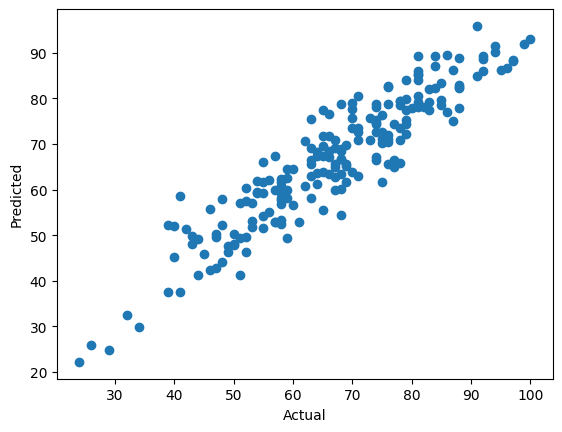

In [15]:
# Plot y_pred and y_test
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

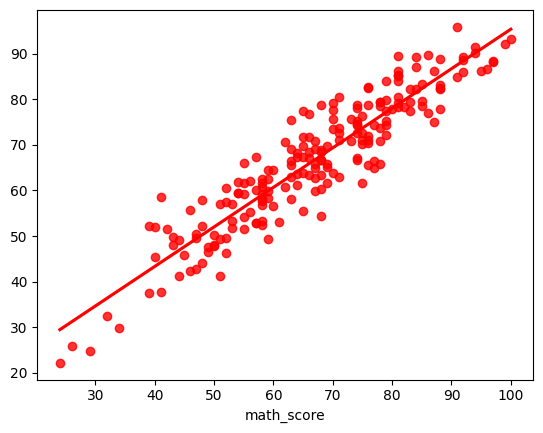

In [16]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [17]:
# Difference between actual and predicted values
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
198,45,45.867188,-0.867188
639,76,65.695312,10.304688
109,70,63.882812,6.117188
618,95,86.226562,8.773438
314,59,59.820312,-0.820312
...,...,...,...
846,91,84.859375,6.140625
758,52,49.546875,2.453125
565,48,52.195312,-4.195312
3,47,50.367188,-3.367188
